In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
data_set = pd.read_csv('Company_Data.csv') 
data_set

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder = preprocessing.LabelEncoder()
data_set['Sales']= label_encoder.fit_transform(data_set['Sales']) 

In [15]:
x=data_set.iloc[:,1:11]
y=data_set['Sales']

In [16]:
x 
pd.set_option("display.max_rows", None) 

In [22]:
x['ShelveLoc'] = x['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})

In [23]:
x['Urban'] = x['Urban'].map({'No': 0, 'Yes': 1})

In [24]:
x['US'] = x['US'].map({'No': 0, 'Yes': 1})

In [25]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
5,124,113,13,501,72,0,78,16,0,1
6,115,105,0,45,108,1,71,15,1,0
7,136,81,15,425,120,2,67,10,1,1
8,132,110,0,108,124,1,76,10,0,0
9,132,113,0,131,124,1,76,17,0,1


In [26]:
y

0      255
1      297
2      267
3      158
4       37
5      290
6      133
7      306
8      129
9       55
10     234
11     309
12      33
13     291
14     294
15     219
16     170
17     315
18     331
19     220
20     122
21     314
22      71
23     103
24     271
25     333
26     203
27      77
28      16
29     184
30     330
31     200
32     117
33     223
34      13
35     293
36     230
37      63
38     131
39      21
40       8
41     189
42     277
43      36
44      38
45      51
46     317
47      45
48      32
49     284
50       5
51      46
52     187
53     145
54      61
55     140
56     307
57       4
58      86
59      75
60     202
61     154
62       6
63     208
64     183
65      61
66     227
67     234
68     328
69     190
70     252
71     126
72      88
73     321
74     117
75     210
76     286
77     177
78      47
79     239
80     191
81     165
82     302
83      46
84       9
85     208
86     218
87     304
88     130
89     188
90      82

In [27]:
data_set['Sales'].unique() 

array([255, 297, 267, 158,  37, 290, 133, 306, 129,  55, 234, 309,  33,
       291, 294, 219, 170, 315, 331, 220, 122, 314,  71, 103, 271, 333,
       203,  77,  16, 184, 330, 200, 117, 223,  13, 293, 230,  63, 131,
        21,   8, 189, 277,  36,  38,  51, 317,  45,  32, 284,   5,  46,
       187, 145,  61, 140, 307,   4,  86,  75, 202, 154,   6, 208, 183,
       227, 328, 190, 252, 126,  88, 321, 210, 286, 177,  47, 239, 191,
       165, 302,   9, 218, 304, 130, 188,  82,  58,  49, 228, 204,  93,
       253, 162, 318,  60,  35,  79,  70,  52,  90,   1,  24, 232, 233,
       132, 135, 110, 242, 209, 226, 169, 156, 141, 303, 142, 196, 229,
       245, 298, 127,  64,  48, 205, 257, 172,  28, 125,  74, 274, 316,
       111, 128, 161,   3, 237,  31, 282, 168, 300, 280, 289, 174, 105,
       143, 178, 163, 272, 319, 243,  53,  15,  27,  96, 198,   2, 137,
       153, 235, 120,   0, 167,  94, 279, 287, 182,  62, 160,  56,  81,
       263, 268, 216, 193, 313, 225, 326, 152,  40,  34,  11,  2

In [28]:
data_set.Sales.value_counts() 

183    4
142    3
243    3
117    3
135    3
223    3
103    3
128    3
34     3
191    2
126    2
127    2
111    2
196    2
46     2
49     2
273    2
55     2
58     2
208    2
122    2
61     2
298    2
210    2
63     2
215    2
216    2
106    2
71     2
74     2
79     2
81     2
84     2
240    2
96     2
93     2
296    2
234    2
318    2
159    2
320    2
31     2
168    2
165    2
137    2
163    2
178    2
148    2
24     2
151    2
184    2
300    2
182    2
304    2
92     1
144    1
152    1
145    1
105    1
104    1
146    1
94     1
101    1
102    1
97     1
147    1
100    1
108    1
95     1
99     1
98     1
149    1
150    1
107    1
131    1
109    1
119    1
130    1
129    1
132    1
125    1
124    1
123    1
133    1
91     1
121    1
134    1
120    1
118    1
110    1
116    1
115    1
114    1
136    1
113    1
112    1
138    1
139    1
140    1
141    1
143    1
335    1
82     1
90     1
28     1
20     1
21     1
22     1
23     1
25     1
26     1
2

In [29]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [30]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

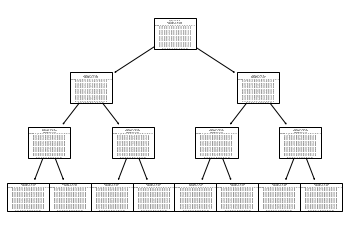

In [31]:
tree.plot_tree(model);

In [32]:
colnames = list(data_set.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

[Text(465.0, 792.75, 'X[2] <= 6.5\nentropy = 8.035\nsamples = 320\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1\n1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1\n1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1\n3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1\n1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 2, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1\n1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1\n1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1\n1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(232.5, 566.25, 'X[3] <= 212.5\nentropy = 7.155\nsamples = 163\nvalue = [1, 0, 0, 1, 

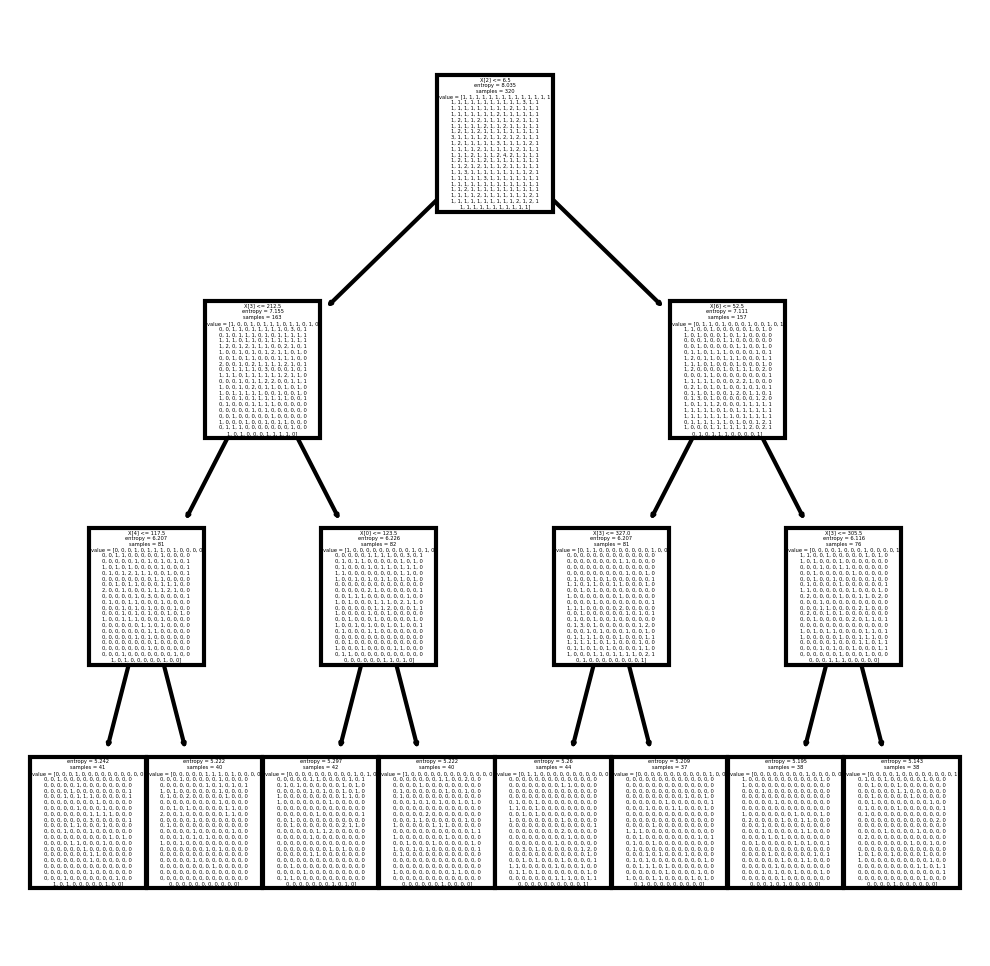

In [41]:
fn=['CompPrice','Income','Advertising','Population','Price','Population','ShelveLoc','Age','Education','Urban']
cn=['high sale', 'low sale']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)

In [42]:
model.feature_importances_ 

array([0.08810364, 0.        , 0.32079176, 0.33764235, 0.08786025,
       0.        , 0.165602  , 0.        , 0.        , 0.        ])

In [43]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Population     0.337642
Advertising    0.320792
ShelveLoc      0.165602
CompPrice      0.088104
Price          0.087860
Urban          0.000000
Education      0.000000
Age            0.000000
Population     0.000000
Income         0.000000
dtype: float64

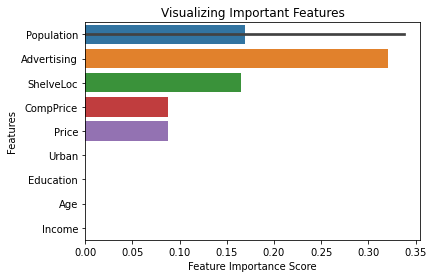

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [45]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

165    18
135    15
74     14
34     10
142     8
14      7
148     6
223     2
dtype: int64

In [46]:
preds

array([135, 135, 148, 165, 142,  34,  14, 142,  74, 148, 165, 165, 148,
       142,  14, 165,  14, 165,  74,  74, 135, 142,  34, 223, 135,  74,
        14,  34,  74, 135, 165,  74, 148,  14,  74, 142, 135,  34, 223,
        74, 135, 165,  74,  34, 142, 135,  34, 142,  34,  74, 165,  74,
        14, 165,  14, 148, 148, 165, 165,  74, 165, 135, 165,  34, 142,
        34, 165, 165,  74, 135, 135, 135, 165,  74, 165, 135,  34, 165,
       135, 135], dtype=int64)

In [47]:
pd.crosstab(y_test,preds) 

col_0,14,34,74,135,142,148,165,223
Sales,,,,,,,,
1,0,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0,0
11,0,1,0,0,0,0,0,0
15,0,0,1,0,0,0,0,0
23,0,0,0,1,0,0,0,0
24,0,0,0,0,0,0,1,0
25,0,0,1,0,0,0,0,0
27,0,0,0,0,0,0,1,0
31,0,0,0,0,0,0,1,0


In [49]:
# Accuracy 
np.mean(preds==y_test)

0.0

In [ ]:
# As per the analysis, the segment or attributes causes high sale are Population (0.337642), Advertising (0.320792), ShelveLoc (0.165602), 
# CompPrice (0.088104) & Price (0.087860). 